# Extending JWST PSFs

This tutorial demonstrates how to build extended JWST ePSF grids using `mophongo.jwst_psf`. It converts a directory of standard PSF grids into extended versions suitable for modelling wide halos.

In [1]:
from pathlib import Path
import os
import logging
from photutils.psf import STDPSFGrid
from mophongo import jwst_psf

logging.basicConfig(level=logging.WARNING)



The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol


Specify the directory containing the JWST STDPSF `*.fits` files. The extended PSFs will be written to a sibling `EXTENDED` directory:

Iterate over all PSF files and build extended PSF grids using `jwst_psf.make_extended_grid`. Existing outputs are skipped.

In [63]:
psf_dir = Path('../data/PSF')
outdir = psf_dir 
for f in psf_dir.rglob('*.fits'):
    outname = outdir / f.name.replace('.fits', '_EXTENDED.fits')  # extended psf
    outname_stpsf = outdir / f.name.replace('.fits', '_WEBB.fits') # webb stpsf

    if outname.exists() or 'EXTENDED' in f.name or 'WEBB' in f.name \
        or 'NRC' not in f.name or not '444' in f.name:
        continue

    epsf = STDPSFGrid(str(f))
    epsf_ext, st_psf = jwst_psf.make_extended_grid(epsf, Rmax=2.0, Rtaper=0.2, bg_pct=10, return_stpsf=True, verbose=True)

    os.makedirs(outdir, exist_ok=True)
    if not outname.exists(): 
        jwst_psf.write_stdpsf(outname, epsf_ext, overwrite=True, verbose=True)
    if not outname_stpsf.exists(): 
        jwst_psf.write_stdpsf(outname_stpsf, st_psf, overwrite=True, verbose=True)


Running instrument: NIRCam, filter: F444W
  Running detector: NRCB5
    Position 1/25: (0, 0) pixels
    Position 1/25 centroid: (np.float64(125.54236086348112), np.float64(125.13774962838109))
    Position 2/25: (0, 512) pixels
    Position 2/25 centroid: (np.float64(125.55629243624058), np.float64(125.10277554967472))
    Position 3/25: (0, 1024) pixels
    Position 3/25 centroid: (np.float64(125.5962072256961), np.float64(125.10631010365869))
    Position 4/25: (0, 1535) pixels
    Position 4/25 centroid: (np.float64(125.59008604009148), np.float64(125.15234893388013))
    Position 5/25: (0, 2047) pixels
    Position 5/25 centroid: (np.float64(125.56609490313461), np.float64(125.19970450533432))
    Position 6/25: (512, 0) pixels
    Position 6/25 centroid: (np.float64(125.54738659064135), np.float64(125.19646802907336))
    Position 7/25: (512, 512) pixels
    Position 7/25 centroid: (np.float64(125.55812958736229), np.float64(125.19295663609796))
    Position 8/25: (512, 1024) pi

After running the above cell the extended PSFs are saved next to the originals in the `EXTENDED` folder.

In [ ]:
data_dir = Path('../data')
psf_dir = data_dir / 'PSF'
grid = jwst_psf.psf_grid_from_wcs_csv('../data/uds-test-f444w_wcs.csv', fov_arcsec=4.0, num_psfs=25,  prefix='UDS',outdir=psf_dir, save=True)
grid = jwst_psf.psf_grid_from_wcs_csv('../data/uds-test-f115w_wcs.csv', fov_arcsec=4.0, num_psfs=25, prefix='UDS', outdir=psf_dir, save=True)
grid = jwst_psf.psf_grid_from_wcs_csv('../data/uds-test-f770w_wcs.csv', fov_arcsec=8.0, num_psfs=9,  prefix='UDS',outdir=psf_dir, save=True)


NIRCAM  filter=F444W  date=2023-01-23  detectors=NRCA5,NRCB5  (76 files in ±2.5 d)

MAST OPD query around UTC: 59967.18805613
                        MJD: 59967.18805613

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3310 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4630 days
User requested choosing OPD time closest in time to 59967.18805613, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.463 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCA5_F444W.fits

Running instrument: NIRCam, filter: F444W
  Running detector: NRCA5
    Position 1/25: (0, 0) pixels
    Position 1/25 centroid: (np.float64(129

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.53266484048592), np.float64(129.5560087607272))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCA5_F444W.fits

MAST OPD query around UTC: 59967.18805613
                        MJD: 59967.18805613

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3310 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4630 days
User requested choosing OPD time closest in time to 59967.18805613, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.463 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCB5_F444W.fits

Running instrument: NIRCam, filter: F444W
  Running detector: NRCB5
    Position 1/25

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.6377865140468), np.float64(129.36351631574968))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCB5_F444W.fits
NIRCAM  filter=F115W  date=2023-01-23  detectors=NRCA1,NRCA2,NRCA3,NRCA4,NRCB1,NRCB2,NRCB3,NRCB4  (304 files in ±2.5 d)

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.51401756907254), np.float64(129.35150704217673))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCA1_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCA2_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCA2
    Position 

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.40557757754132), np.float64(129.43413484485183))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCA2_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCA3_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCA3
    Position 

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.23793232296086), np.float64(129.41253630350775))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCA3_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCA4_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCA4
    Position 

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.39735342430743), np.float64(129.4482182394926))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCA4_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCB1_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCB1
    Position 1

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.79656718103334), np.float64(129.6031192050731))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCB1_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCB2_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCB2
    Position 1

  warnings.warn(warning_message)



    Position 20/25 centroid: (np.float64(129.37727812486918), np.float64(129.52604397659024))
    Position 21/25: (2047, 0) pixels
    Position 21/25 centroid: (np.float64(128.77812445433298), np.float64(129.95359608833414))
    Position 22/25: (2047, 512) pixels
    Position 22/25 centroid: (np.float64(128.97387963610348), np.float64(129.8492033639271))
    Position 23/25: (2047, 1024) pixels
    Position 23/25 centroid: (np.float64(129.16631672732836), np.float64(129.71981790549606))
    Position 24/25: (2047, 1535) pixels
    Position 24/25 centroid: (np.float64(129.26867087634454), np.float64(129.72060085803588))
    Position 25/25: (2047, 2047) pixels


  warnings.warn(



    Position 25/25 centroid: (np.float64(129.40210478111592), np.float64(129.75266443288945))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCB2_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCB3_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCB3
    Position 

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.7625038465372), np.float64(129.28363090103807))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCB3_F115W.fits

MAST OPD query around UTC: 59967.157610238
                        MJD: 59967.157610238

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.3006 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.4935 days
User requested choosing OPD time closest in time to 59967.157610238, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.493 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_NRCB4_F115W.fits

Running instrument: NIRCam, filter: F115W
  Running detector: NRCB4
    Position 1

  warnings.warn(



    Position 25/25 centroid: (np.float64(129.3759987532214), np.float64(129.35039558698804))
Wrote 25 PSFs ➜ ../data/PSF/UDS_NRCB4_F115W.fits
MIRI  filter=F770W  date=2023-01-23  detectors=MIRI  (76 files in ±2.5 d)

MAST OPD query around UTC: 59967.142733539
                        MJD: 59967.142733539

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023012202-NRCA3_FP1-1.fits
	Date (MJD):	 59965.8570
	Delta time:	 -1.2857 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023012303-NRCA3_FP1-1.fits
	Date (MJD):	 59967.6511
	Delta time:	 0.5084 days
User requested choosing OPD time closest in time to 59967.142733539, which is R2023012303-NRCA3_FP1-1.fits, delta time 0.508 days
Importing and format-converting OPD from /Users/ivo/Astro/PROJECTS/JWST/PSF/stpsf-data/MAST_JWST_WSS_OPDs/R2023012303-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point (NRCA3_FP1)
OUTFILE: UDS_MIRI_F770W.fits

Running i

  warnings.warn(warning_message)



    Position 1/9 centroid: (np.float64(145.40386153949598), np.float64(145.50102196898152))
    Position 2/9: (0, 512) pixels


  warnings.warn(warning_message)



    Position 2/9 centroid: (np.float64(145.289777888775), np.float64(145.7044800890932))
    Position 3/9: (0, 1023) pixels
    Position 3/9 centroid: (np.float64(145.3035783513282), np.float64(145.3581205403685))
    Position 4/9: (512, 0) pixels
    Position 4/9 centroid: (np.float64(145.3917899402033), np.float64(145.53884005445278))
    Position 5/9: (512, 512) pixels
    Position 5/9 centroid: (np.float64(145.53631881587705), np.float64(145.44043641523382))
    Position 6/9: (512, 1023) pixels
    Position 6/9 centroid: (np.float64(145.47579300317963), np.float64(145.5858670308979))
    Position 7/9: (1023, 0) pixels
    Position 7/9 centroid: (np.float64(145.45606676074988), np.float64(145.5995559755086))
    Position 8/9: (1023, 512) pixels
    Position 8/9 centroid: (np.float64(145.51921022274865), np.float64(145.57802194857732))
    Position 9/9: (1023, 1023) pixels


  warnings.warn(



    Position 9/9 centroid: (np.float64(145.71181404499816), np.float64(145.51022489474164))
Wrote 9 PSFs ➜ ../data/PSF/UDS_MIRI_F770W.fits


In [4]:
#grid = jwst_psf.psf_grid_from_wcs_csv('../data/uds-test-f770w_wcs.csv', fov_arcsec=8.0, num_psfs=9, save=False)
grid

<GriddedPSFModel(flux=1., x_0=0., y_0=0.)>

In [8]:
grid.meta

{'instrume': ('MIRI', 'Instrument name'),
 'detector': ('MIRIM', 'Detector name'),
 'filter': ('F770W', 'Filter name'),
 'pupilopd': ('OPD from supplied FITS HDUlist object',
  'Pupil OPD source name'),
 'opd_file': ('R2023012303-NRCA3_FP1-1.fits', 'Pupil OPD file name'),
 'opdslice': (0, 'Pupil OPD slice number'),
 'fovpixel': (73, 'Field of view in pixels (full array)'),
 'fov': (np.float64(8.096942825), 'Field of view in arcsec (full array)'),
 'oversamp': (4, 'Oversampling factor for FFTs in computation'),
 'det_samp': (4, 'Oversampling factor for MFT to detector plane'),
 'nwaves': (9, 'Number of wavelengths used in calculation'),
 'det_yx0': ('(0.0, 0.0)', "The #0 PSF's (y,x) detector pixel position"),
 'det_yx1': ('(512.0, 0.0)', "The #1 PSF's (y,x) detector pixel position"),
 'det_yx2': ('(1023.0, 0.0)', "The #2 PSF's (y,x) detector pixel position"),
 'det_yx3': ('(0.0, 512.0)', "The #3 PSF's (y,x) detector pixel position"),
 'det_yx4': ('(512.0, 512.0)', "The #4 PSF's (y,x) de

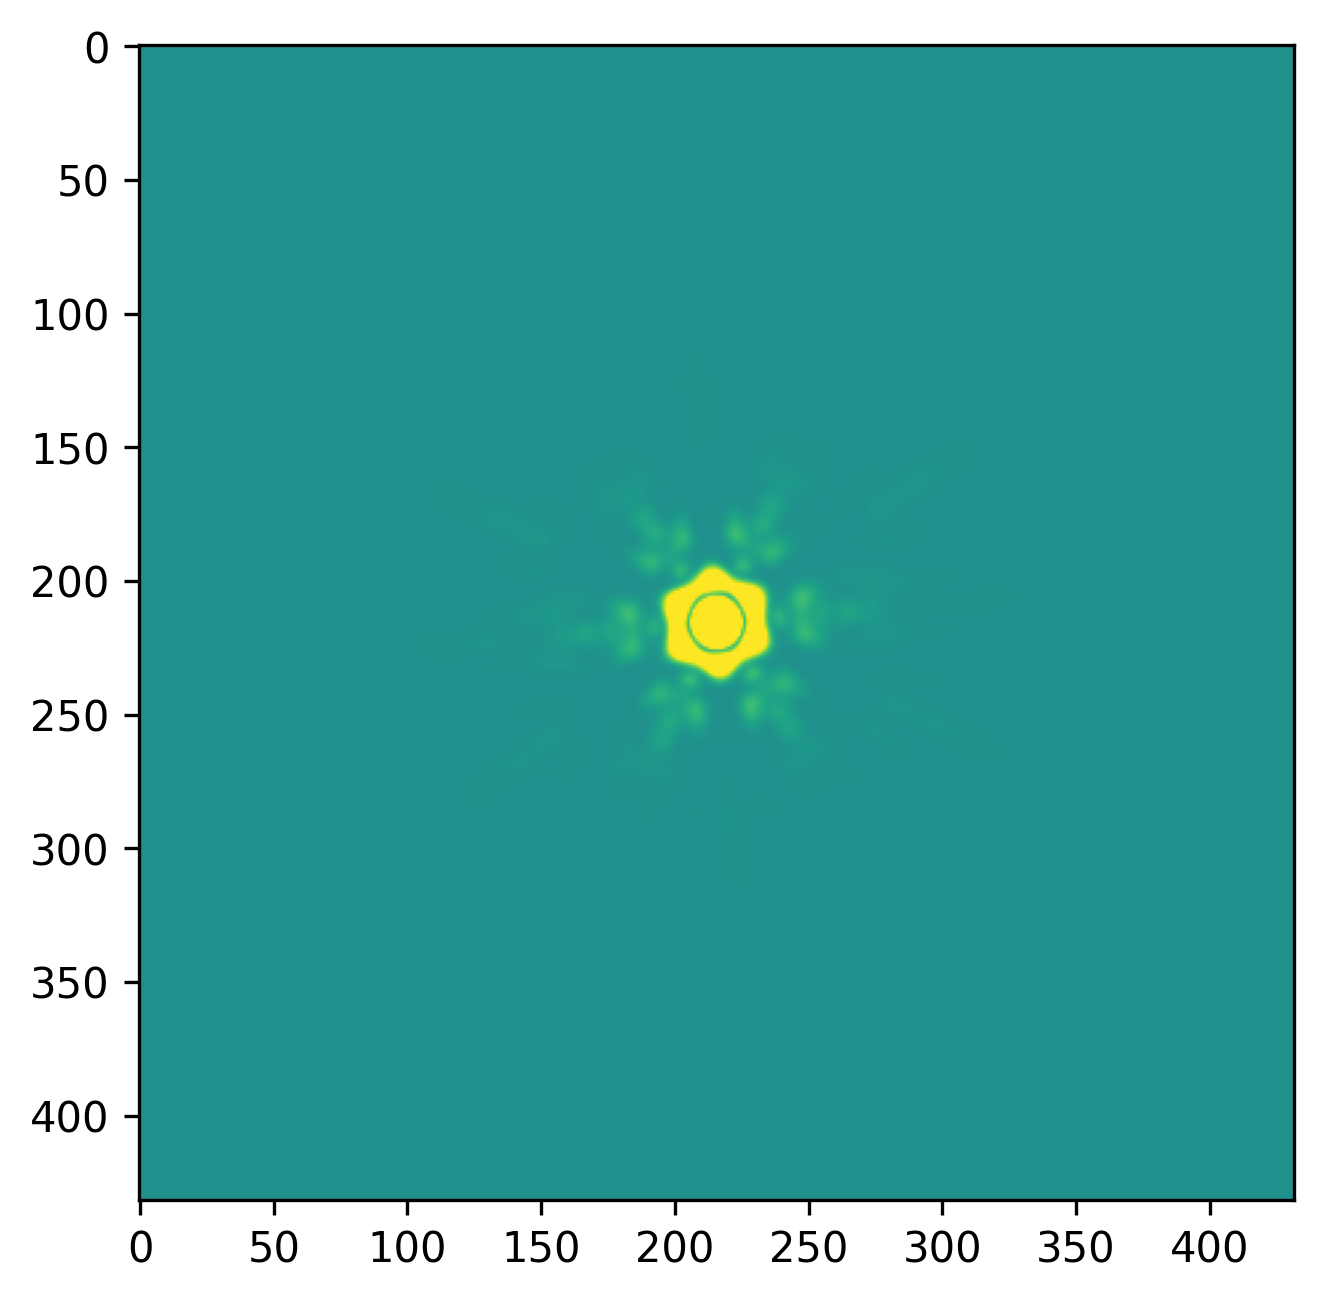

In [35]:
from matplotlib import pyplot as plt
plt.imshow(hdu[0].data,vmin=-0.0001,vmax=0.0001)

In [10]:
'_'.join(['1','NRCA1','2'])

'1_NRCA1_2'